In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

Craga de datos

In [4]:
data = pd.read_csv('Occupancy_Estimation.csv')
data

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1      2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2      2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3      2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4      2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
...           ...       ...      ...      ...      ...      ...       ...   
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0            34        53        40      0.08      0.19      0.06      0.06   
1            33        53        40      0.93      0.05      0.06      0.06   
2            34        53        40      0.43      0.11      0.08      0.06   
3            34        53        40      0.41      0.10      0.10      0.09   
4            34        54        40      0.18      0.06      0.06      0.06   
...         ...       ...       ...       ...       ...       ...       ...   
10124         7        33        22      0.09      0.04      0.06      0.08   
10125         7        34        22      0.07      0.05      0.05      0.08   
10126         7        34        22      0.11      0.05      0.06      0.08   
10127         7        34        22      0.08      0.08      0.10      0.08   
10128         7        34        22      0.08      0.05      0.06      0.08   

       S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0         390      0.769231       0       0                     1  
1         390      0.646154       0       0                     1  
2         390      0.519231       0       0                     1  
3         390      0.388462       0       0                     1  
4         390      0.253846       0       0                     1  
...       ...           ...     ...     ...                   ...  
10124     345      0.000000       0       0                     0  
10125     345      0.000000       0       0                     0  
10126     345      0.000000       0       0                     0  
10127     345      0.000000       0       0                     0  
10128     345      0.000000       0       0                     0  

[10129 rows x 19 columns]

In [67]:
data['Date'].unique()

array(['2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2018/01/10', '2018/01/11'], dtype=object)

In [127]:
data['Room_Occupancy_Count'].unique()

array([1, 2, 3, 0], dtype=int64)

In [76]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [81]:
data['Promedio_Temperaturas'] = data[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']].mean(axis=1)
data['Promedio_Luz'] = data[['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']].mean(axis=1)
data['Promedio_Soni'] = data[['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']].mean(axis=1)

In [ ]:
# Seleccionar un día específico (por ejemplo, el 22 de diciembre de 2017)
selected_date = '2017-12-22'
data_selected_date = data[data['DateTime'].dt.date == pd.to_datetime(selected_date).date()]

# Graficar todas las mediciones de 'S1_Temp' a lo largo del tiempo en el día seleccionado

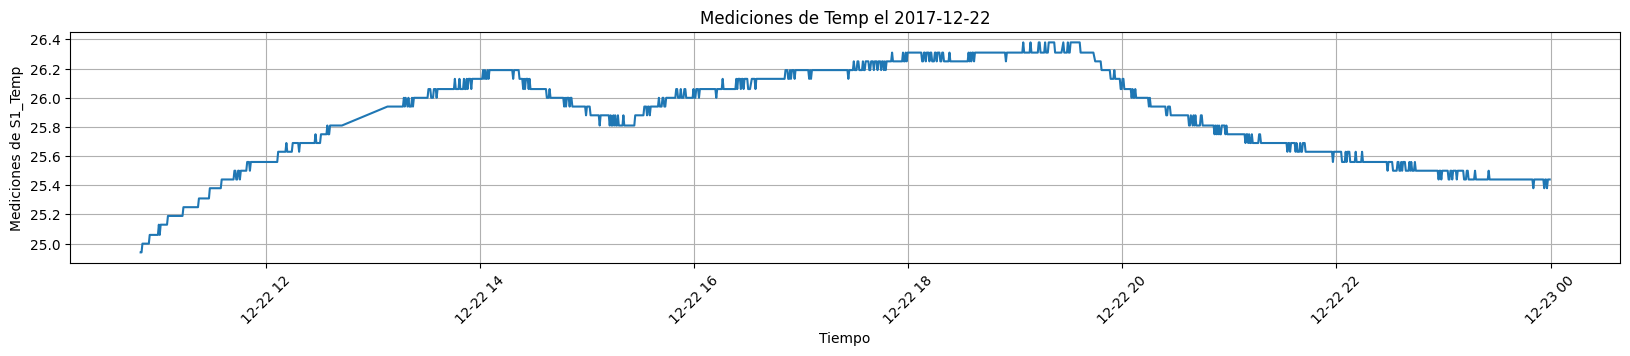

In [87]:
plt.figure(figsize=(20, 3))
plt.plot(data_selected_date['DateTime'], data_selected_date['S1_Temp'])
plt.title(f'Mediciones de Temp el {selected_date}')
plt.xlabel('Tiempo')
plt.ylabel('Mediciones de S1_Temp')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



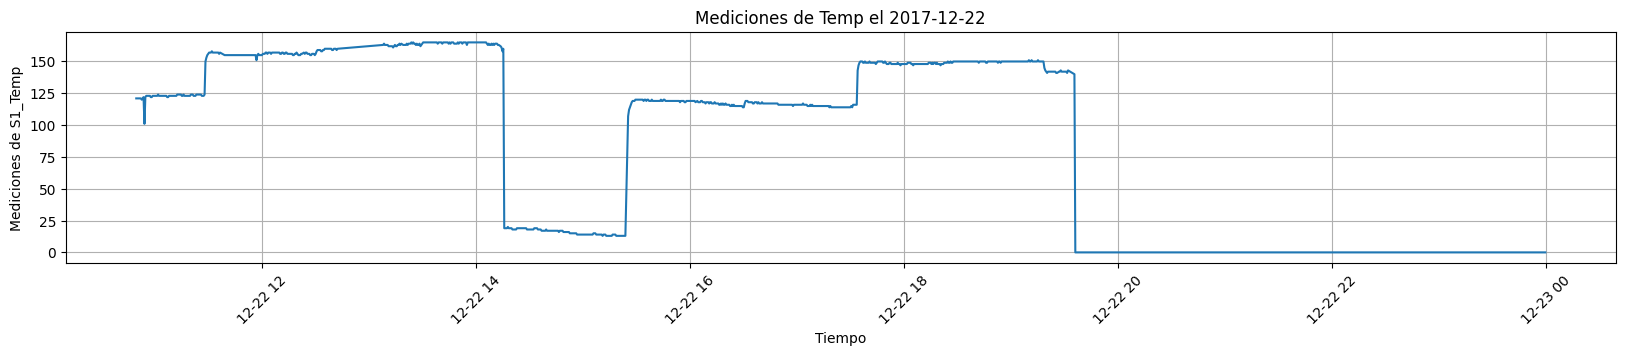

In [86]:
plt.figure(figsize=(20, 3))
plt.plot(data_selected_date['DateTime'], data_selected_date['S1_Light'])
plt.title(f'Mediciones de Temp el {selected_date}')
plt.xlabel('Tiempo')
plt.ylabel('Mediciones de S1_Temp')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [14]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
column_list = ['S1_Temp', 'S1_Light', 'S1_Sound','S5_CO2', 'S5_CO2_Slope']
selected_date_list = ['2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2018/01/10', '2018/01/11']
num_plots = len(column_list)  # Número de subplots basado en el tamaño de la lista

fig, axes = plt.subplots(num_plots, 1, figsize=(12, 9))  # 1 columna y 'num_plots' filas

# Iterar sobre la lista de nombres de columnas y crear subplots
for i, columna in enumerate(column_list):
    for j in range(len(selected_date_list)):
        data_selected_date = data[data['DateTime'].dt.date == pd.to_datetime(selected_date_list[j]).date()]
        #axes[i].plot(data_selected_date[columna]) # Establecer el título del subplot como el nombre de la columna
        axes[i].plot(data_selected_date['DateTime'].dt.hour + data_selected_date['DateTime'].dt.minute / 60,
                     data_selected_date[columna])
        axes[i].set_title(columna,fontsize=10)  # Establecer el título del subplot como el nombre de la columna
        axes[i].set_xlabel('Hour')
        #axes[i].set_xlim(10, 23)

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

In [132]:
group_a_values = data.loc[data['Room_Occupancy_Count'] == 0,'S1_Light']
group_a_values
#10129

346      19
347      19
348      19
349      19
350      20
         ..
10124     6
10125     6
10126     6
10127     6
10128     6
Name: S1_Light, Length: 8228, dtype: int64

C:\Users\JULIANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


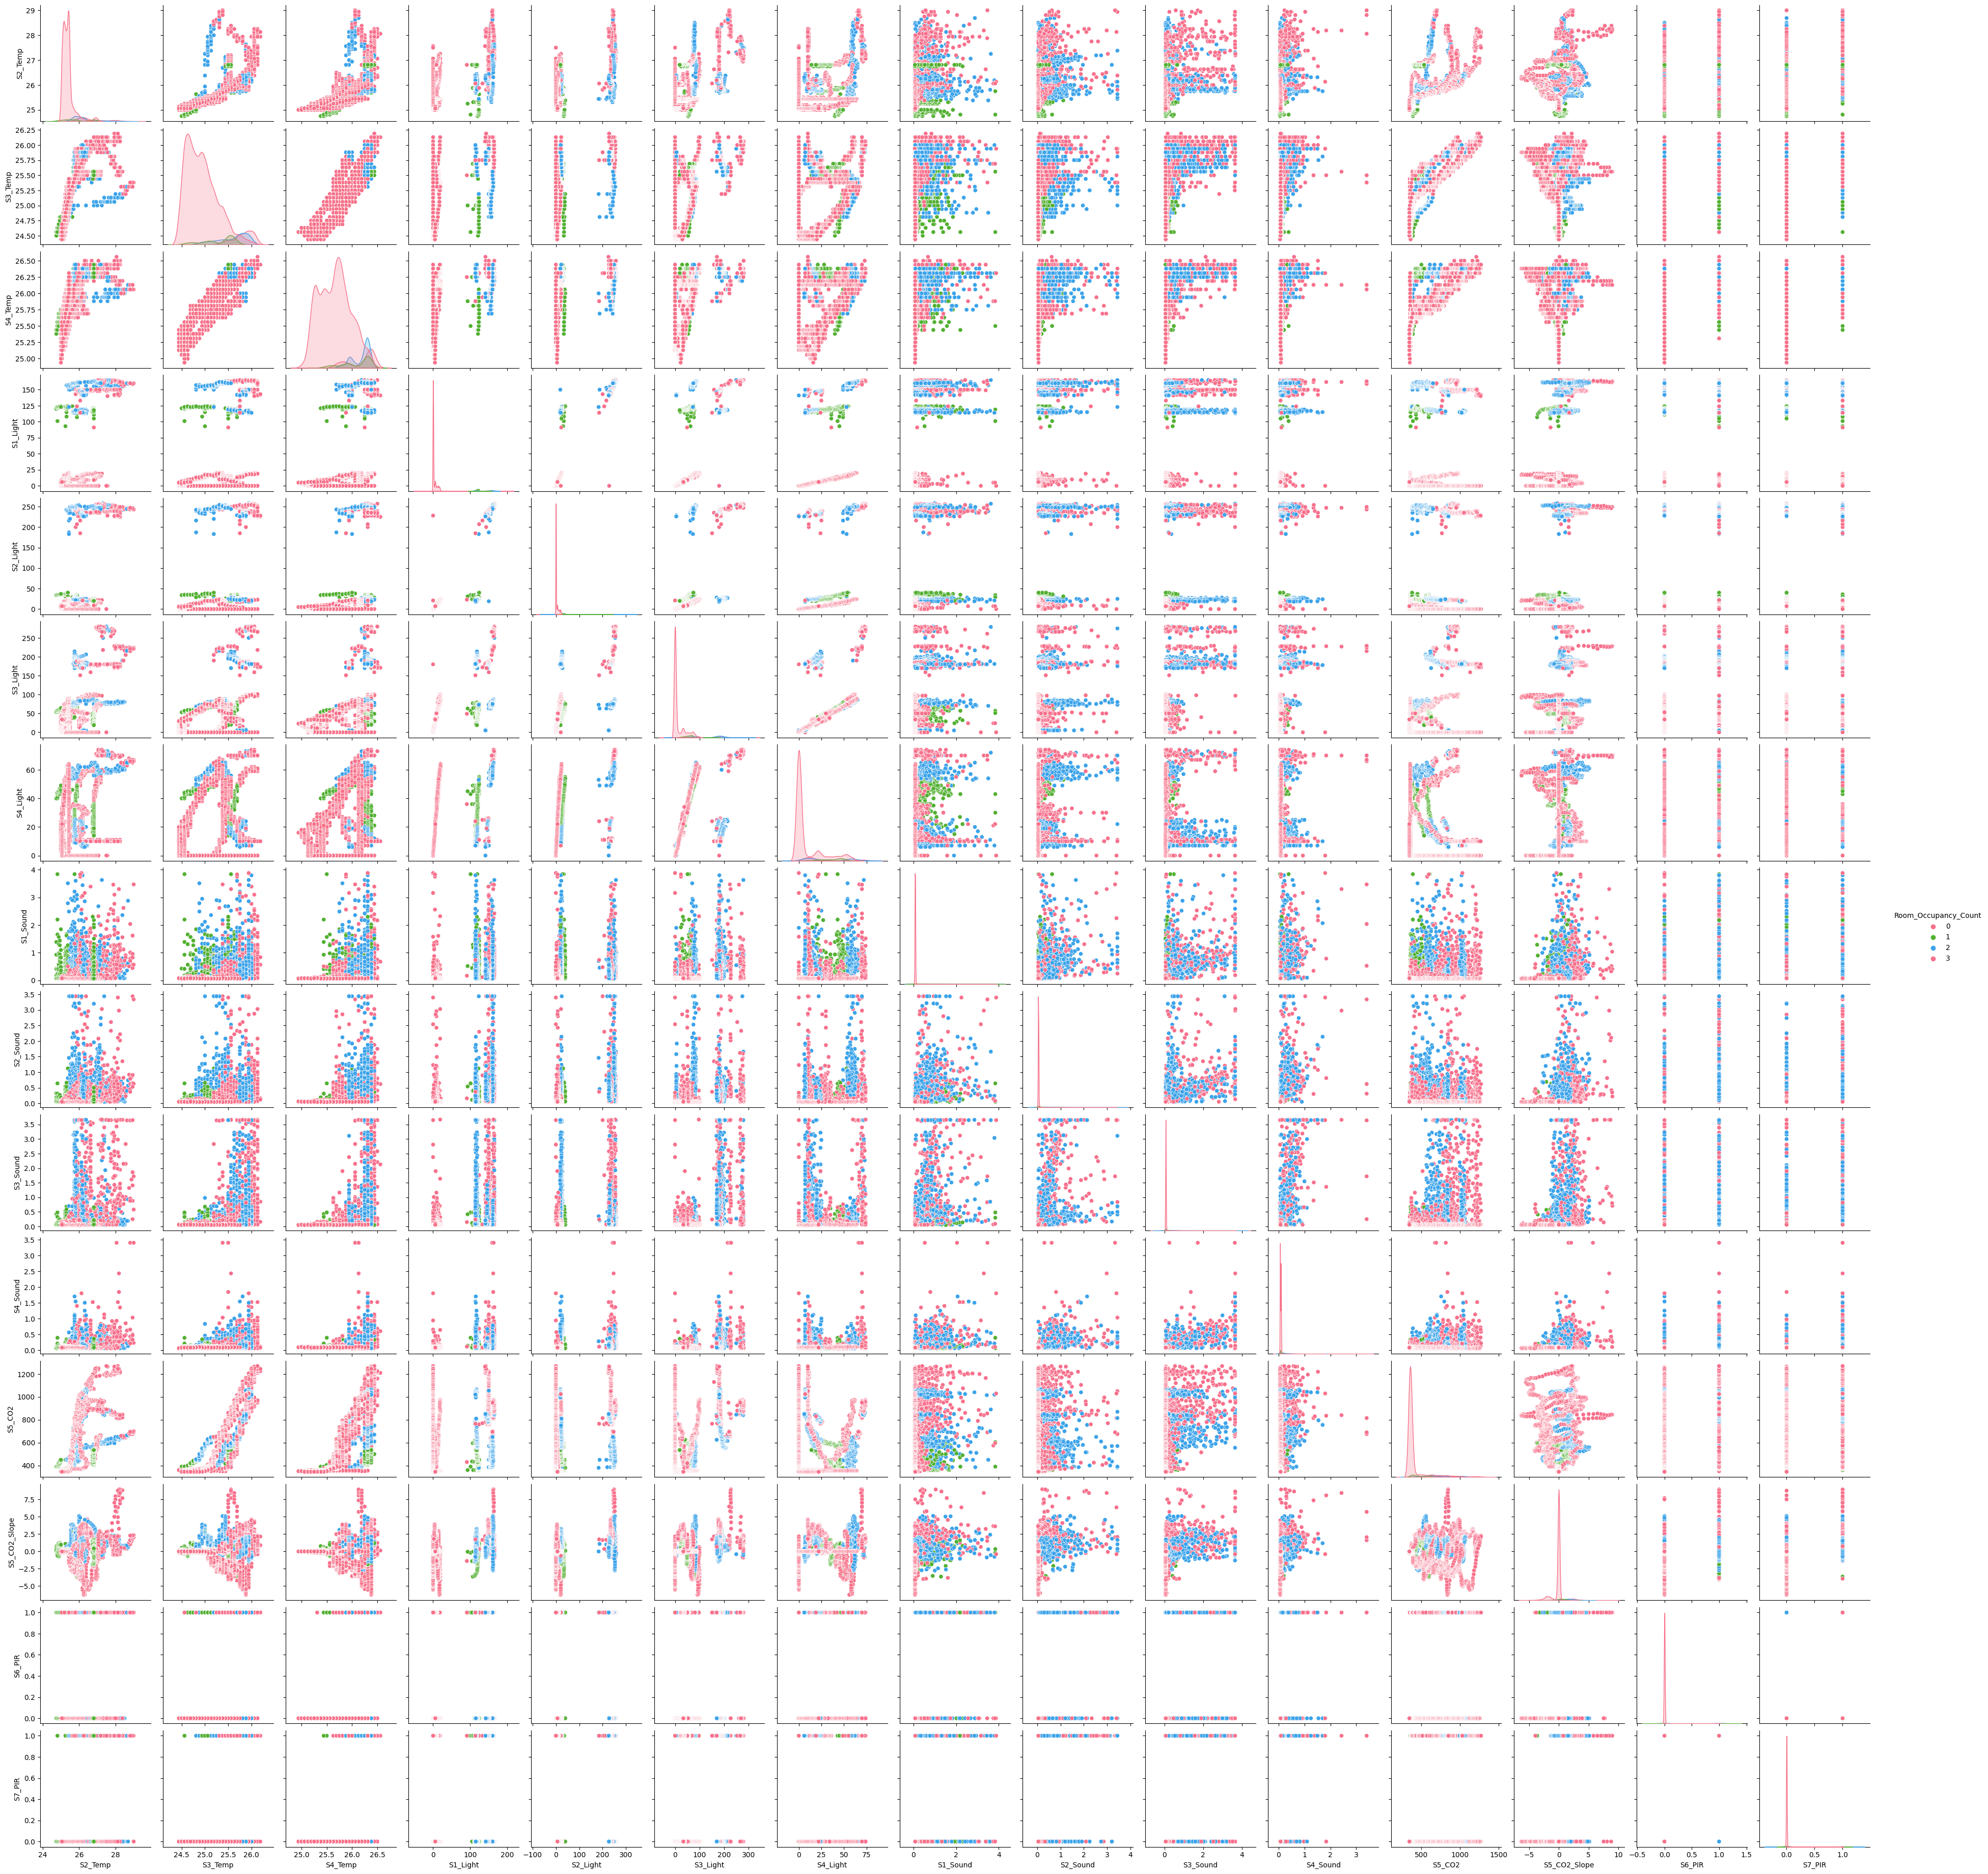

In [3]:
sns.pairplot(data.iloc[:,3:], hue='Room_Occupancy_Count', palette='husl')
plt.show()

In [35]:
dict_ez_01={}
# Calcular el tamaño del efecto (cohen's d) para cada columna numérica
for metric in data.iloc[:, 2:-1]:
  ez=pg.compute_effsize(data[data['Room_Occupancy_Count']==0][metric],data[data['Room_Occupancy_Count']==1][metric])
  dict_ez_01[metric]=abs(ez)

df_ez1=pd.DataFrame.from_dict(dict_ez_01,orient='index',columns=['ez_01'])
df_ez1

C:\Users\JULIANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pingouin\effsize.py:804: RuntimeWarning: divide by zero encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd


ez_01
S1_Temp                1.642811
S2_Temp                1.271665
S3_Temp                1.112059
S4_Temp                1.401235
S1_Light              23.038868
S2_Light               4.255917
S3_Light               1.709971
S4_Light               1.710095
S1_Sound               2.822998
S2_Sound               1.247643
S3_Sound               0.858755
S4_Sound               0.490849
S5_CO2                 0.494514
S5_CO2_Slope           0.735524
S6_PIR                 2.865540
S7_PIR                 0.677288
Room_Occupancy_Count        inf

In [43]:
df_filtrado = df_ez1[df_ez1['ez_01'] > 0.6]
ez_selected_01=list(df_filtrado.index)
ez_selected_01

['S1_Temp',
 'S2_Temp',
 'S3_Temp',
 'S4_Temp',
 'S1_Light',
 'S2_Light',
 'S3_Light',
 'S4_Light',
 'S1_Sound',
 'S2_Sound',
 'S3_Sound',
 'S5_CO2_Slope',
 'S6_PIR',
 'S7_PIR',
 'Room_Occupancy_Count']

In [36]:
dict_ez_02={}
# Calcular el tamaño del efecto (cohen's d) para cada columna numérica
for metric in data.iloc[:, 2:-1]:
  ez=pg.compute_effsize(data[data['Room_Occupancy_Count']==0][metric],data[data['Room_Occupancy_Count']==2][metric])
  dict_ez_02[metric]=abs(ez)

df_ez2=pd.DataFrame.from_dict(dict_ez_02,orient='index',columns=['ez_02'])
df_ez2

C:\Users\JULIANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pingouin\effsize.py:804: RuntimeWarning: divide by zero encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd


ez_02
S1_Temp                2.779029
S2_Temp                2.248050
S3_Temp                2.017427
S4_Temp                1.742820
S1_Light              17.450950
S2_Light               4.089403
S3_Light               4.248464
S4_Light               1.216551
S1_Sound               3.099108
S2_Sound               2.731240
S3_Sound               2.347894
S4_Sound               2.443019
S5_CO2                 2.178907
S5_CO2_Slope           1.643699
S6_PIR                 3.138256
S7_PIR                 2.891661
Room_Occupancy_Count        inf

In [37]:
dict_ez_03={}
# Calcular el tamaño del efecto (cohen's d) para cada columna numérica
for metric in data.iloc[:, 2:-1]:
  ez=pg.compute_effsize(data[data['Room_Occupancy_Count']==0][metric],data[data['Room_Occupancy_Count']==3][metric])
  dict_ez_03[metric]=abs(ez)

df_ez3=pd.DataFrame.from_dict(dict_ez_02,orient='index',columns=['ez_03'])
df_ez3

C:\Users\JULIANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pingouin\effsize.py:804: RuntimeWarning: divide by zero encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd


ez_03
S1_Temp                2.779029
S2_Temp                2.248050
S3_Temp                2.017427
S4_Temp                1.742820
S1_Light              17.450950
S2_Light               4.089403
S3_Light               4.248464
S4_Light               1.216551
S1_Sound               3.099108
S2_Sound               2.731240
S3_Sound               2.347894
S4_Sound               2.443019
S5_CO2                 2.178907
S5_CO2_Slope           1.643699
S6_PIR                 3.138256
S7_PIR                 2.891661
Room_Occupancy_Count        inf

In [38]:
dict_ez_12={}
# Calcular el tamaño del efecto (cohen's d) para cada columna numérica
for metric in data.iloc[:, 2:-1]:
  ez=pg.compute_effsize(data[data['Room_Occupancy_Count']==1][metric],data[data['Room_Occupancy_Count']==2][metric])
  dict_ez_12[metric]=abs(ez)

df_ez12=pd.DataFrame.from_dict(dict_ez_12,orient='index',columns=['ez_12'])
df_ez12

C:\Users\JULIANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pingouin\effsize.py:804: RuntimeWarning: divide by zero encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd


ez_12
S1_Temp               0.950317
S2_Temp               0.553738
S3_Temp               0.910300
S4_Temp               0.412599
S1_Light              0.985265
S2_Light              1.187988
S3_Light              1.674832
S4_Light              0.360833
S1_Sound              0.359625
S2_Sound              0.864431
S3_Sound              0.793089
S4_Sound              0.879440
S5_CO2                1.495648
S5_CO2_Slope          0.712289
S6_PIR                0.273802
S7_PIR                0.945382
Room_Occupancy_Count       inf

In [39]:
dict_ez_13={}
# Calcular el tamaño del efecto (cohen's d) para cada columna numérica
for metric in data.iloc[:, 2:-1]:
  ez=pg.compute_effsize(data[data['Room_Occupancy_Count']==1][metric],data[data['Room_Occupancy_Count']==3][metric])
  dict_ez_13[metric]=abs(ez)

df_ez13=pd.DataFrame.from_dict(dict_ez_13,orient='index',columns=['ez_13'])
df_ez13

C:\Users\JULIANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pingouin\effsize.py:804: RuntimeWarning: divide by zero encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd


ez_13
S1_Temp               1.131205
S2_Temp               1.164155
S3_Temp               1.985731
S4_Temp               0.356510
S1_Light              0.136668
S2_Light              1.815024
S3_Light              1.625071
S4_Light              0.619564
S1_Sound              0.205353
S2_Sound              0.795316
S3_Sound              0.840204
S4_Sound              0.603890
S5_CO2                1.919910
S5_CO2_Slope          1.481401
S6_PIR                0.406522
S7_PIR                1.575659
Room_Occupancy_Count       inf

In [47]:
dict_ez_23={}
# Calcular el tamaño del efecto (cohen's d) para cada columna numérica
for metric in data.iloc[:, 2:-1]:
  ez=pg.compute_effsize(data[data['Room_Occupancy_Count']==2][metric],data[data['Room_Occupancy_Count']==3][metric])
  dict_ez_23[metric]=abs(ez)

df_ez23=pd.DataFrame.from_dict(dict_ez_23,orient='index',columns=['ez_23'])
df_ez23

C:\Users\JULIANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pingouin\effsize.py:804: RuntimeWarning: divide by zero encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd


ez_23
S1_Temp               0.257581
S2_Temp               0.698350
S3_Temp               0.850172
S4_Temp               0.018965
S1_Light              0.481570
S2_Light              0.399706
S3_Light              0.252624
S4_Light              0.204248
S1_Sound              0.147565
S2_Sound              0.106145
S3_Sound              0.137065
S4_Sound              0.034827
S5_CO2                0.629005
S5_CO2_Slope          0.746544
S6_PIR                0.129441
S7_PIR                0.468975
Room_Occupancy_Count       inf

In [49]:
effec_size=pd.concat((df_ez1,df_ez2,df_ez3, df_ez12,df_ez13,df_ez23),axis=1)
effec_size

ez_01      ez_02      ez_03     ez_12     ez_13  \
S1_Temp                1.642811   2.779029   2.779029  0.950317  1.131205   
S2_Temp                1.271665   2.248050   2.248050  0.553738  1.164155   
S3_Temp                1.112059   2.017427   2.017427  0.910300  1.985731   
S4_Temp                1.401235   1.742820   1.742820  0.412599  0.356510   
S1_Light              23.038868  17.450950  17.450950  0.985265  0.136668   
S2_Light               4.255917   4.089403   4.089403  1.187988  1.815024   
S3_Light               1.709971   4.248464   4.248464  1.674832  1.625071   
S4_Light               1.710095   1.216551   1.216551  0.360833  0.619564   
S1_Sound               2.822998   3.099108   3.099108  0.359625  0.205353   
S2_Sound               1.247643   2.731240   2.731240  0.864431  0.795316   
S3_Sound               0.858755   2.347894   2.347894  0.793089  0.840204   
S4_Sound               0.490849   2.443019   2.443019  0.879440  0.603890   
S5_CO2                 0.494514   2.178907   2.178907  1.495648  1.919910   
S5_CO2_Slope           0.735524   1.643699   1.643699  0.712289  1.481401   
S6_PIR                 2.865540   3.138256   3.138256  0.273802  0.406522   
S7_PIR                 0.677288   2.891661   2.891661  0.945382  1.575659   
Room_Occupancy_Count        inf        inf        inf       inf       inf   

                         ez_23  
S1_Temp               0.257581  
S2_Temp               0.698350  
S3_Temp               0.850172  
S4_Temp               0.018965  
S1_Light              0.481570  
S2_Light              0.399706  
S3_Light              0.252624  
S4_Light              0.204248  
S1_Sound              0.147565  
S2_Sound              0.106145  
S3_Sound              0.137065  
S4_Sound              0.034827  
S5_CO2                0.629005  
S5_CO2_Slope          0.746544  
S6_PIR                0.129441  
S7_PIR                0.468975  
Room_Occupancy_Count       inf

In [ ]:
effec_size

In [65]:
for c in effec_size.columns:
    print (c)

ez_01
ez_02
ez_03
ez_12
ez_13
ez_23


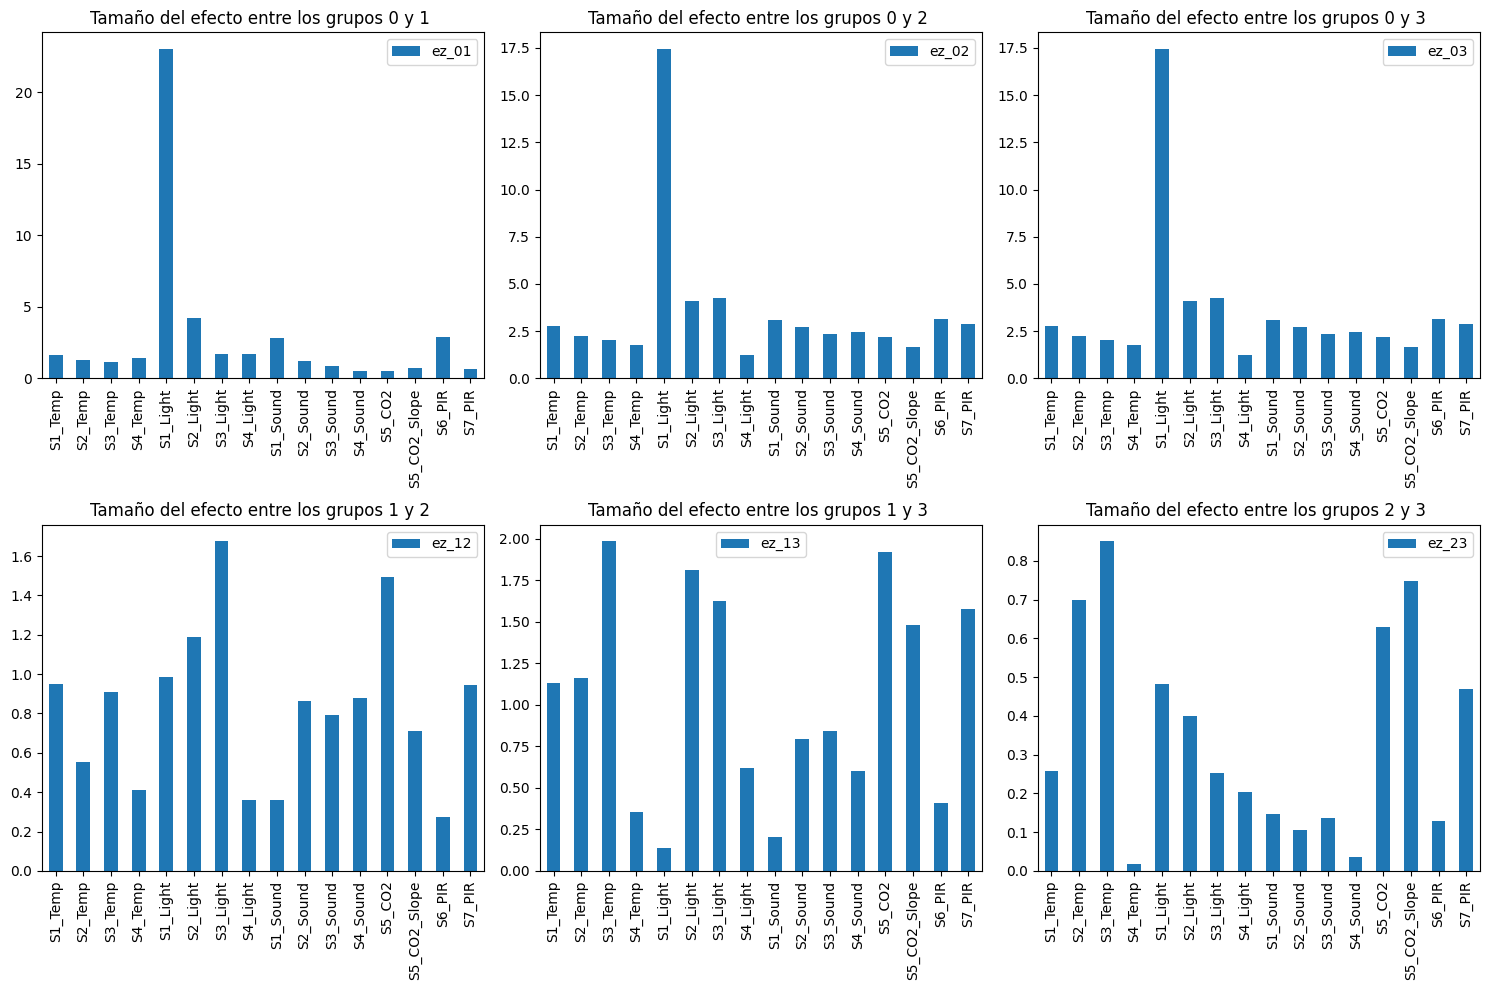

In [75]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Crear subtramas de 2 filas y 3 columnas

for c, ax in zip(effec_size.columns, axes.flatten()):
    effec_size.iloc[:-1].plot(y=c, kind='bar', ax=ax)
    ax.set_title(f'Tamaño del efecto entre los grupos {c[3]} y {c[4]} ')  # Establecer el título de cada gráfico como el nombre de la columna

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

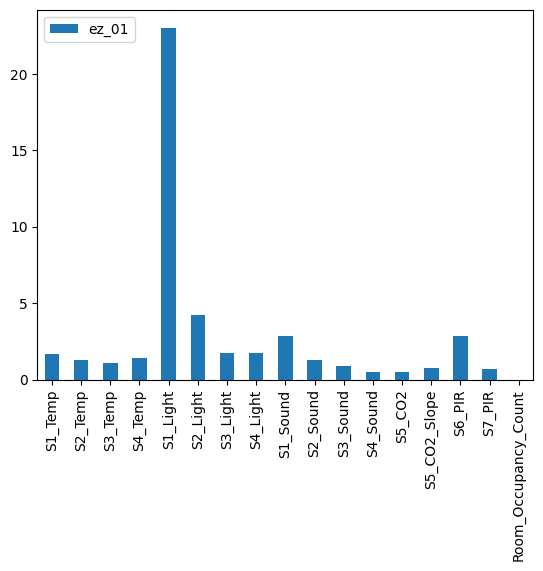

In [70]:
for c in effec_size.columns:
    effec_size.plot(y='ez_01',kind='bar')
    plt.show()

Text(0, 0.5, 'Temp')

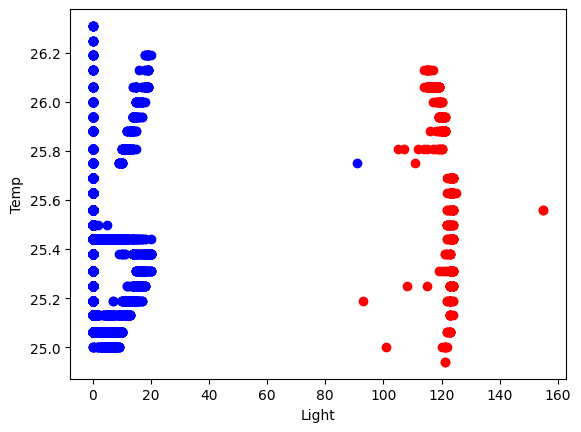

In [136]:
plt.scatter(data.loc[data['Room_Occupancy_Count'] == 0,'S1_Light'], data.loc[data['Room_Occupancy_Count'] == 0,'S1_Temp'], label='Oc 0', c='b')
plt.scatter(data.loc[data['Room_Occupancy_Count'] == 1,'S1_Light'], data.loc[data['Room_Occupancy_Count'] == 1,'S1_Temp'], label='Oc 1', c='r')
plt.xlabel('Light')
plt.ylabel('Temp')